<a href="https://colab.research.google.com/github/davidofitaly/06_classification_projects/blob/main/05_svc/01_iris_datasets_project.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Data description](#2)
4. [Create a copy data](#3)
5. [Data mining and precprocessing](#4)
6. [Correlation](#5)
7. [Division of data into training data and test collection](#6)
8. [Random Forest Classification](#7)
9. [Model-based Prediction](#8)
10. [Model evaluation](#9)


### <a name='0'> </a> Import of libraries

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter= dict(float=lambda x: f'{x:.2f}'))

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'> </a> Data loading

In [ ]:
# Import load_breast_cancer datasets
from sklearn.datasets import load_iris

# Load load_breast_cancer
iris_data = load_iris()

In [ ]:
# Display of collection keys
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Create DataFrame and add target
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['class'] = iris_data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### <a name='2'> </a> Data description




The Iris dataset consists of measurements of iris flowers from three different species: **Setosa**, **Versicolor**, and **Virginica**. Each flower sample is characterized by four features:

- **sepal length (cm)**: The length of the sepal, which is the outer part of the flower, measured in centimeters.
- **sepal width (cm)**: The width of the sepal, measured in centimeters.
- **petal length (cm)**: The length of the petal, which is the inner part of the flower, measured in centimeters.
- **petal width (cm)**: The width of the petal, measured in centimeters.

### Target: Species
- **target**: This is the target variable, representing the species of the iris flower:
  - `0`: Setosa
  - `1`: Versicolor
  - `2`: Virginica

Each sample in the dataset is labeled with one of these three species, allowing for classification based on the four features measured. The dataset contains a total of 150 samples, with 50 samples for each species.


### <a name='3'> </a> Create a copy data

In [ ]:
# Create a copy of the DataFrame
df = iris_df.copy()

# Display DataFrame information (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### <a name='4'> </a> Data mining and precprocessing

- Duplicates

In [ ]:
# Show rows that are duplicates
df[df.duplicated()]

# Delete duplicate row
df = df.drop_duplicates()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   class              149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


- Missing values

In [ ]:
# Count the number of missing (null) values in each column
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
class,0


- Describe data

In [ ]:
# Show summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal width (cm),149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal length (cm),149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal width (cm),149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5
class,149.0,0.993289,0.817847,0.0,0.0,1.0,2.0,2.0


- Data distribution

class
0    50
1    50
2    49
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


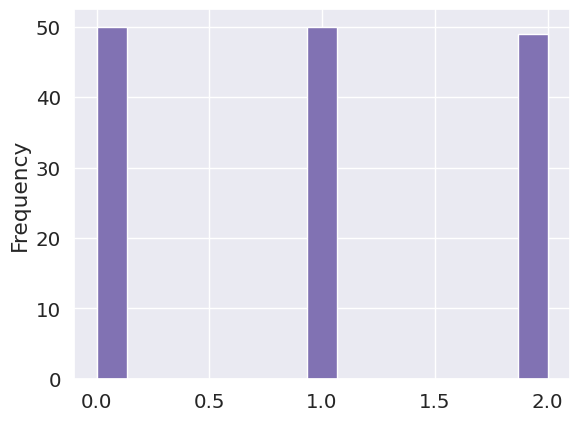

In [ ]:
print(df['class'].value_counts())
print(df['class'].plot(kind='hist', bins=15, color='m'))

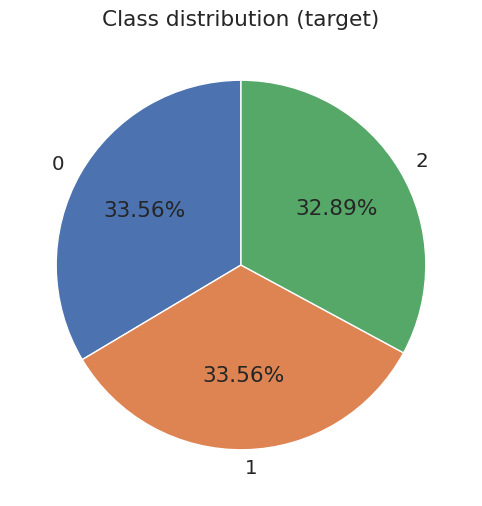

In [ ]:
class_counts = df['class'].value_counts()

# Create a plot-pie
plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Class distribution (target)')
plt.ylabel('')
plt.show()

sepal length (cm)
5.0    10
5.1     9
6.3     9
6.7     8
5.7     8
5.5     7
6.4     7
4.9     6
5.8     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


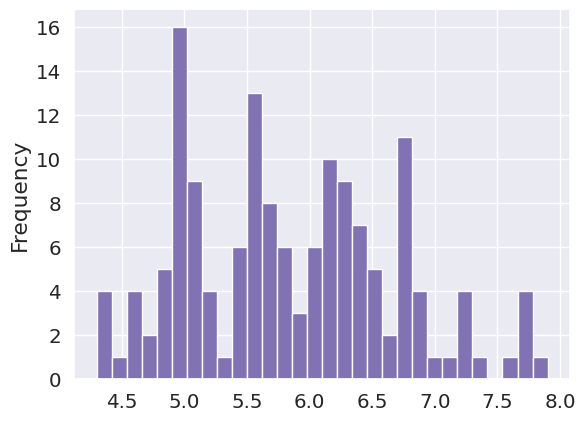

In [ ]:
print(df['sepal length (cm)'].value_counts())
print(df['sepal length (cm)'].plot(kind='hist', bins=30, color='m'))

sepal width (cm)
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


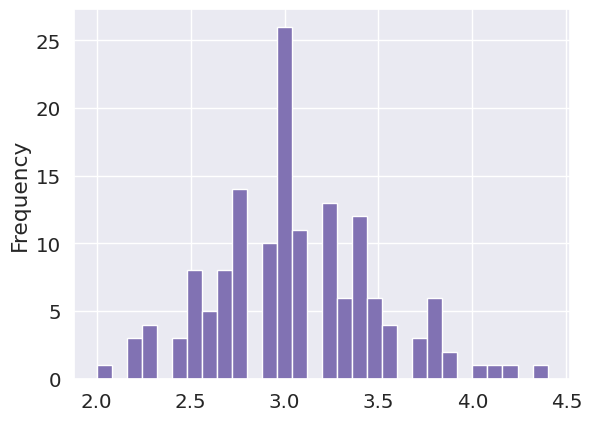

In [ ]:
print(df['sepal width (cm)'].value_counts())
print(df['sepal width (cm)'].plot(kind='hist', bins=30, color='m'))

petal length (cm)
1.4    13
1.5    13
4.5     8
1.6     7
5.1     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


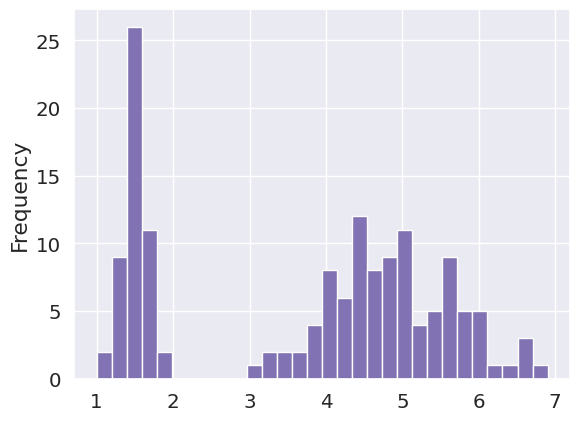

In [ ]:
print(df['petal length (cm)'].value_counts())
print(df['petal length (cm)'].plot(kind='hist', bins=30, color='m'))

petal width (cm)
0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.6     4
1.9     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


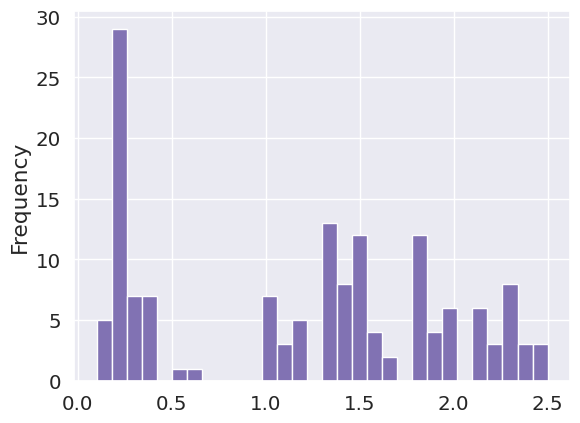

In [ ]:
print(df['petal width (cm)'].value_counts())
print(df['petal width (cm)'].plot(kind='hist', bins=30, color='m'))

- Scatter plot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

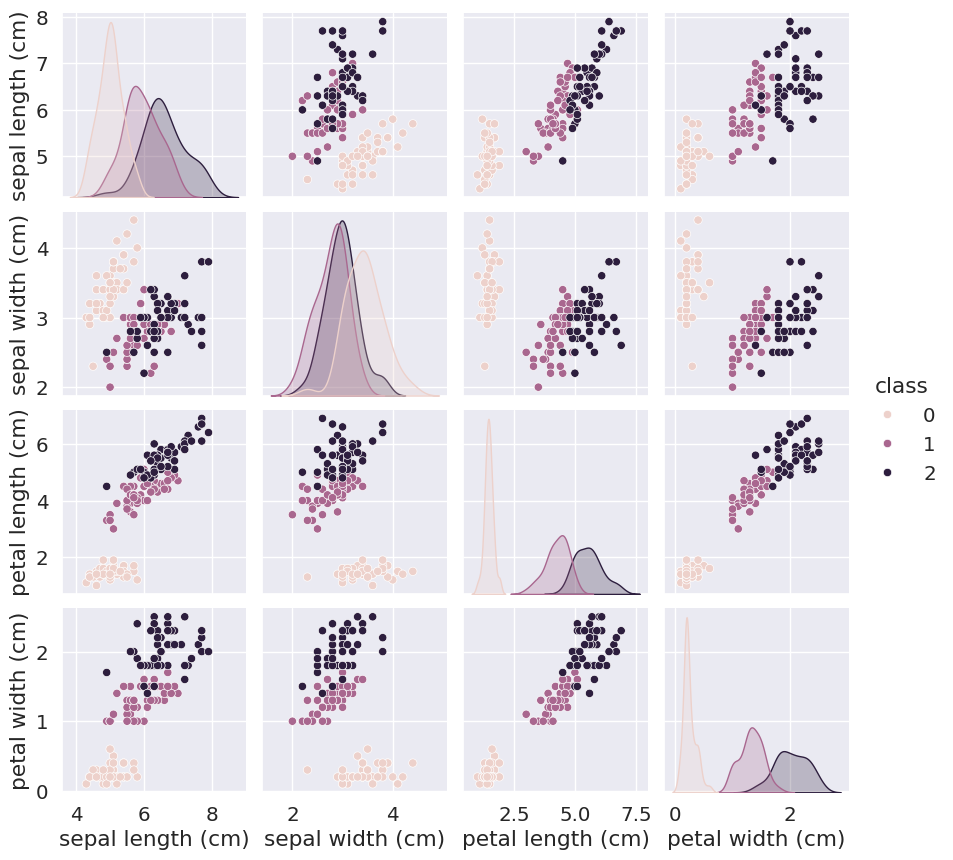

In [ ]:
_ = sns.pairplot(df, vars=iris_data['feature_names'], hue='class', height=2.2, aspect=1)

### <a name='5'> </a> Correlation

In [ ]:
# Calculate the correlation matrix for the DataFrame
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
class,0.786971,-0.422987,0.949402,0.956514,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

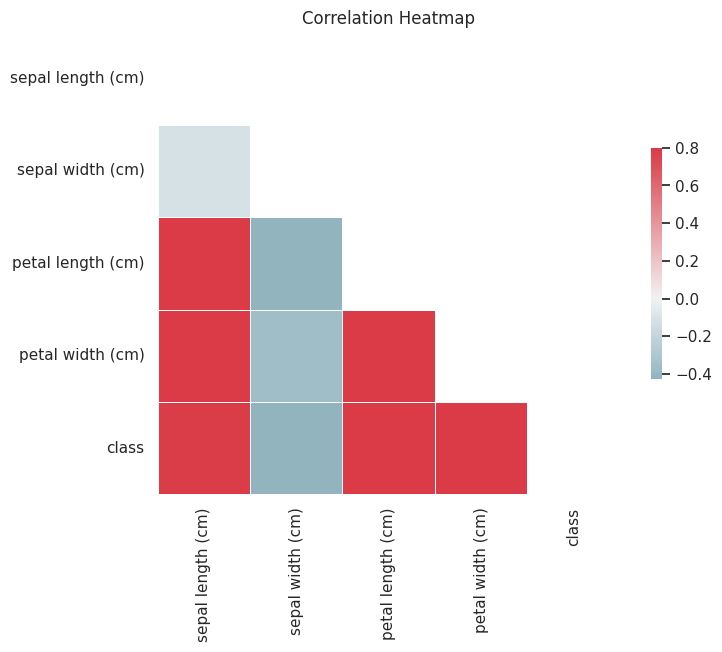

In [ ]:
sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap

In [ ]:
# Calculate and sort the correlation of all features in descending order
df.corr()['class'].sort_values(ascending=False)

,class
class,1.000000
petal width (cm),0.956514
petal length (cm),0.949402
sepal length (cm),0.786971
sepal width (cm),-0.422987


<Axes: >

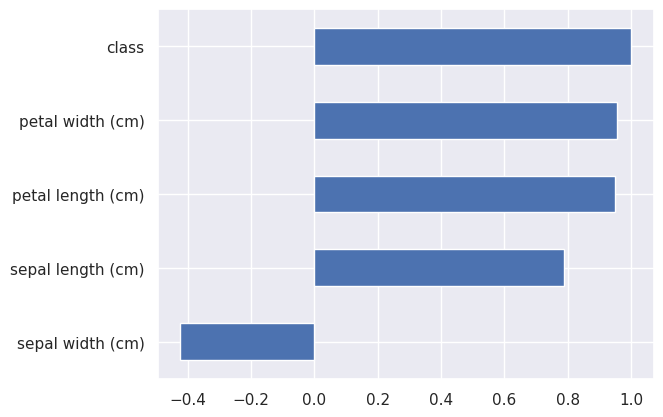

In [ ]:
sns.set()
# Calculate the correlation of all features with 'Price', sort them, and plot as a horizontal bar chart
df.corr()['class'].sort_values().plot(kind='barh')

In [ ]:
# Create a copy of the DataFrame
data = df.copy()

# Remove the 'Price' column from data and store it as the target variable
target = data.pop('class')

data = data[['sepal length (cm)', 'sepal width (cm)']]

data.head()


,0
sepal length (cm),5.1
sepal width (cm),3.5


In [ ]:
# Display the first 5 rows of the target variable (Price)
target.head()

,class
0,0
1,0
2,0
3,0
4,0


### <a name='6'> </a> Division of data into training data and test collection

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Print the shape of each set to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (104, 2)
X_test shape: (45, 2)
y_train shape: (104,)
y_test shape: (45,)


###<a name='7'> </a> Random Forest Classification

In [ ]:
# Import the function to visualize decision boundaries of classifiers
from mlxtend.plotting import plot_decision_regions

# Convert DataFrames to NumPy arrays for compatibility with scikit-learn functions
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
# Import the Random Forest classifier from scikit-learn for ensemble learning
from sklearn.ensemble import RandomForestClassifier

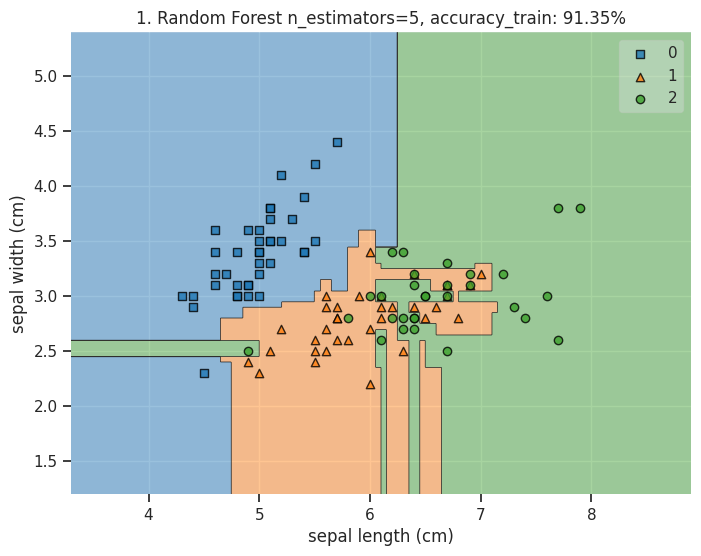


-------------------------------------------------------------------------------------------



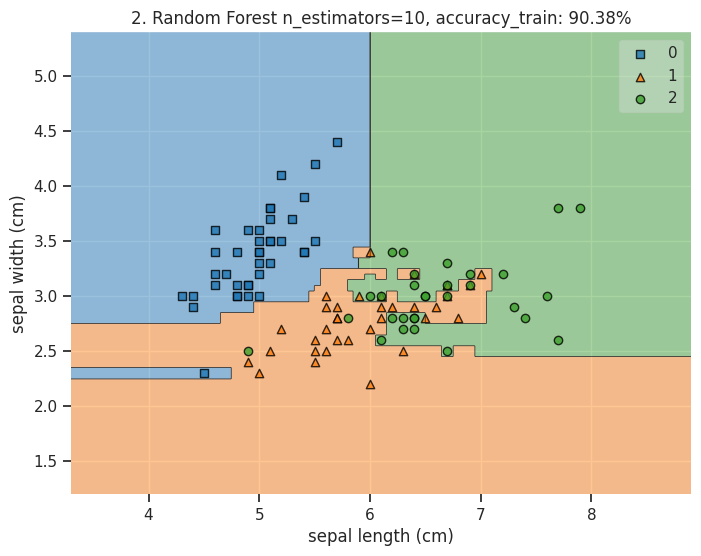


-------------------------------------------------------------------------------------------



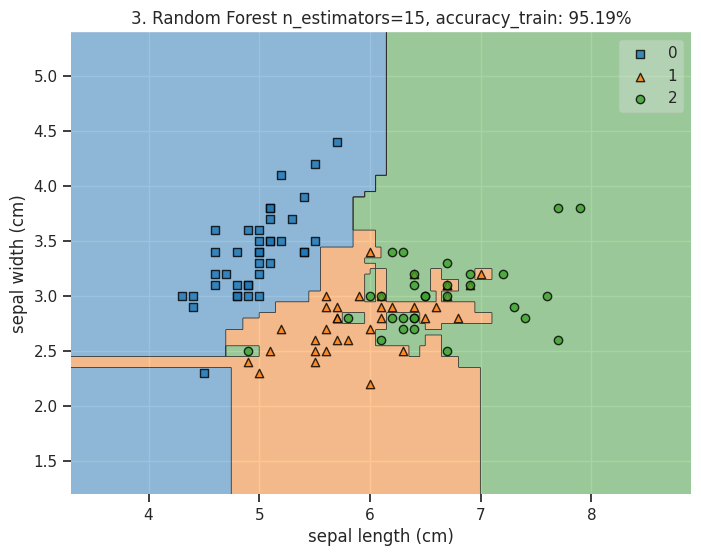


-------------------------------------------------------------------------------------------



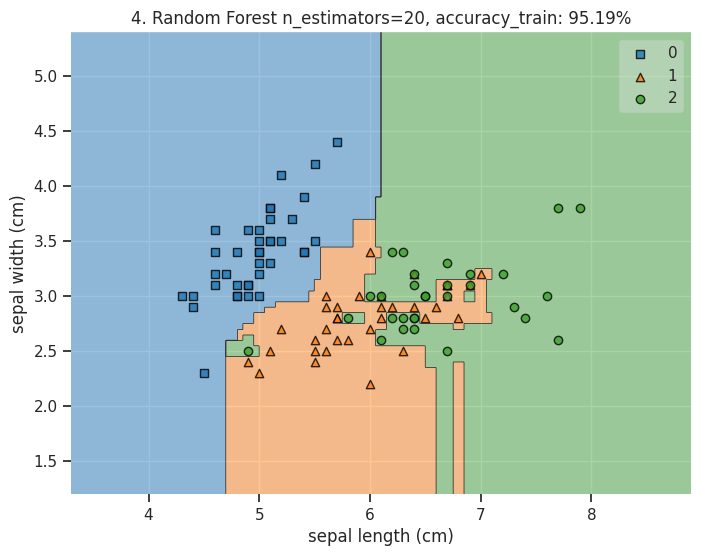


-------------------------------------------------------------------------------------------



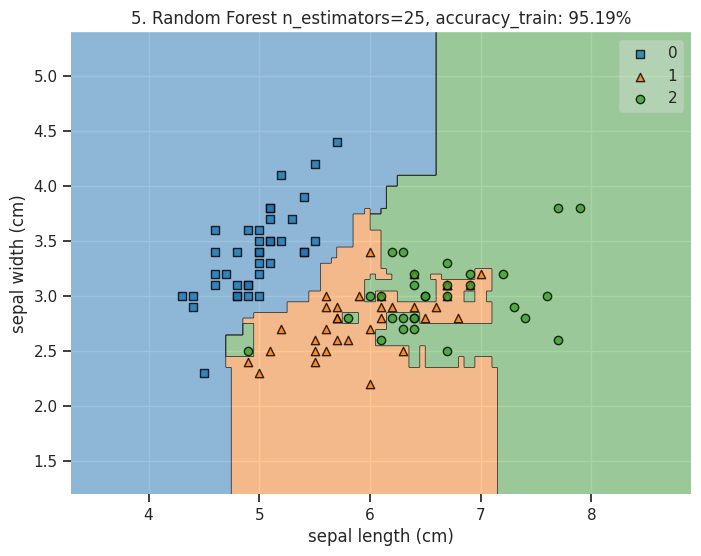


-------------------------------------------------------------------------------------------



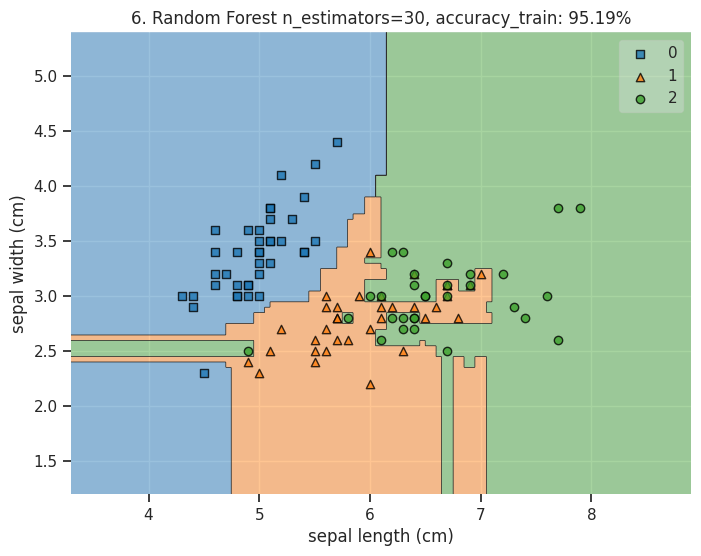


-------------------------------------------------------------------------------------------



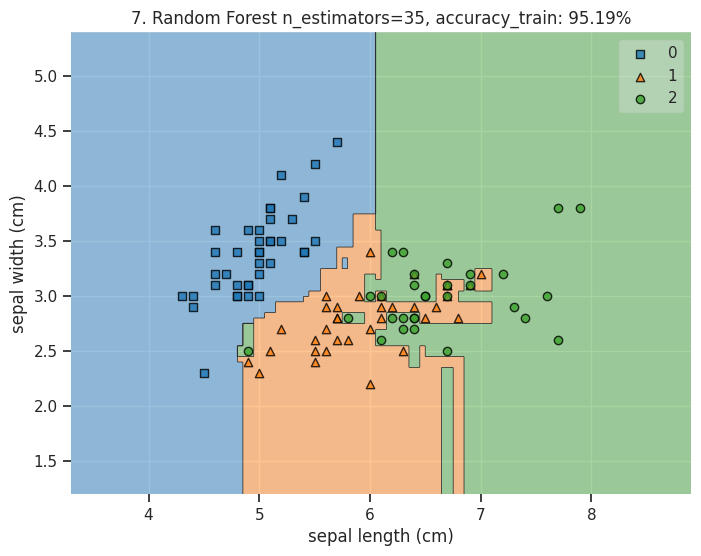


-------------------------------------------------------------------------------------------



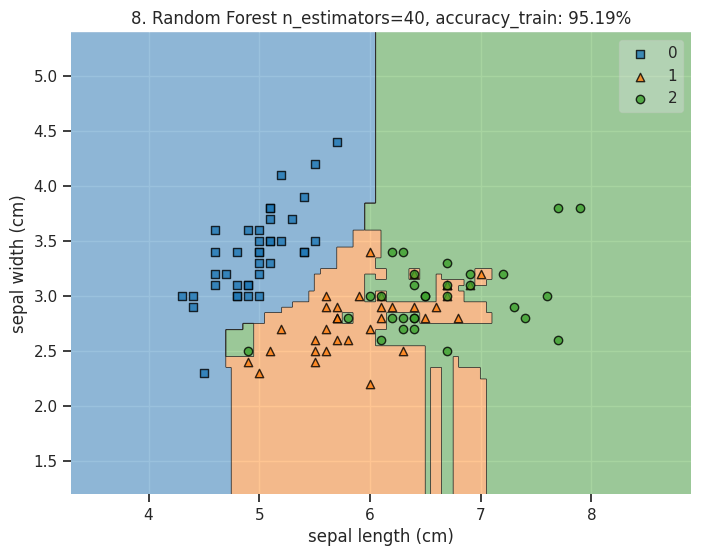


-------------------------------------------------------------------------------------------



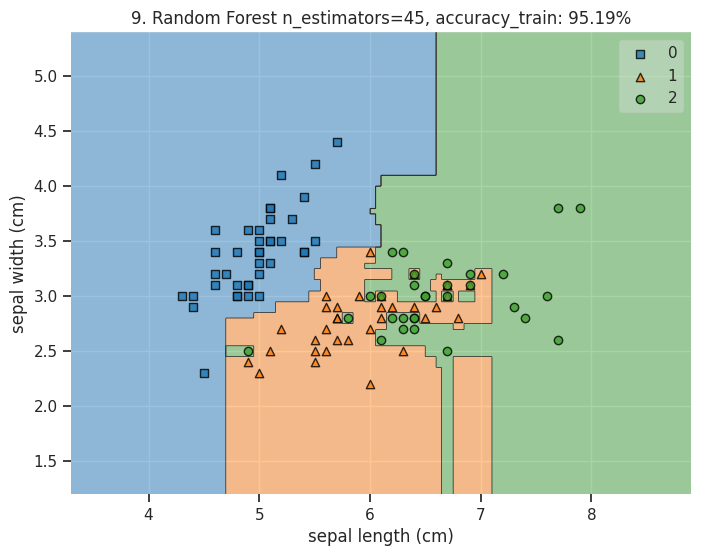


-------------------------------------------------------------------------------------------



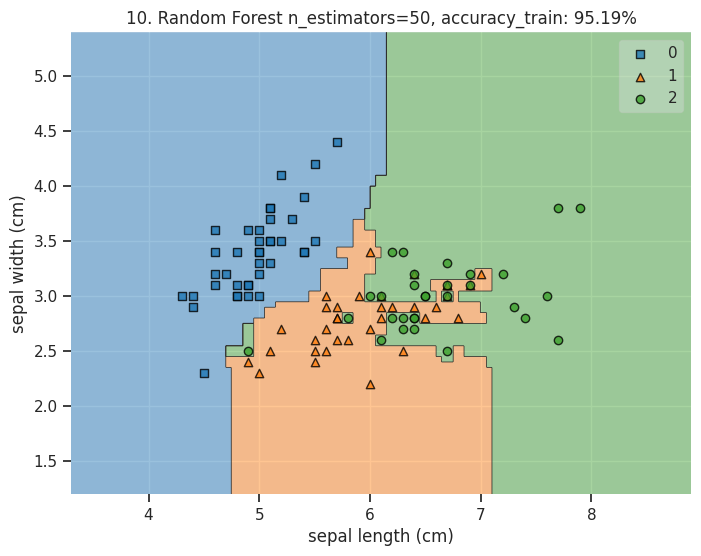


-------------------------------------------------------------------------------------------



In [ ]:
# Iterate over different values of n_estimators for the Random Forest classifier
for index, i in enumerate(range(5, 55, 5), start=1):

    classifier = RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train_np, y_train_np)
    accuracy = classifier.score(X_train_np, y_train_np)
    plt.figure(figsize=(8,6))
    plot_decision_regions(X_train_np, y_train_np, clf=classifier)
    plt.title(f'{index}. Random Forest n_estimators={i}, accuracy_train: {accuracy*100:.2f}%')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

    print('\n' + '-' * 91 + '\n')


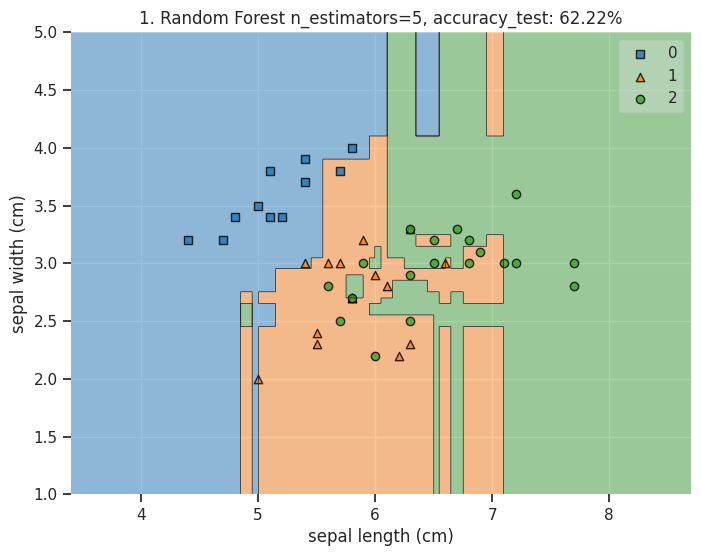


-------------------------------------------------------------------------------------------



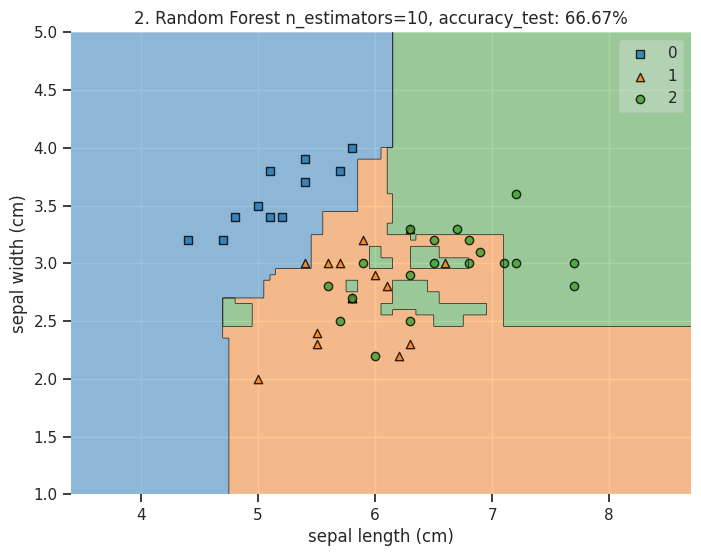


-------------------------------------------------------------------------------------------



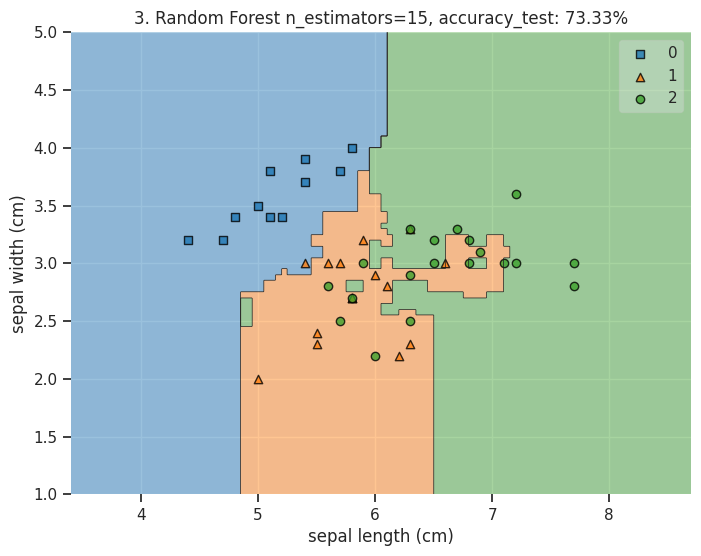


-------------------------------------------------------------------------------------------



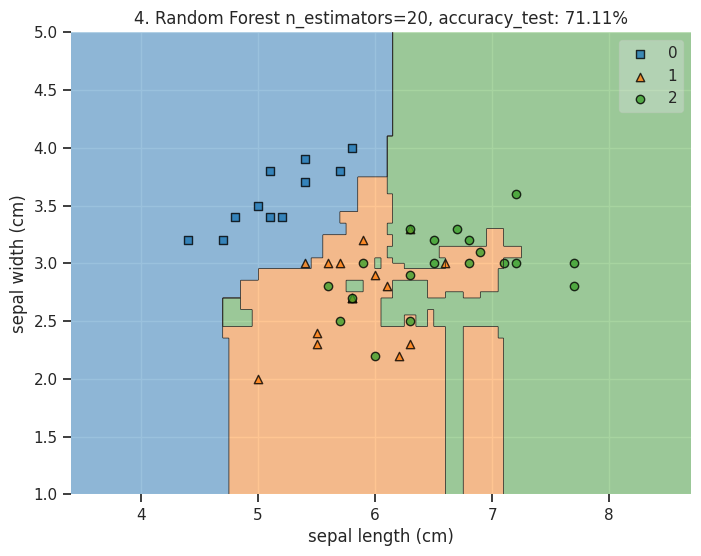


-------------------------------------------------------------------------------------------



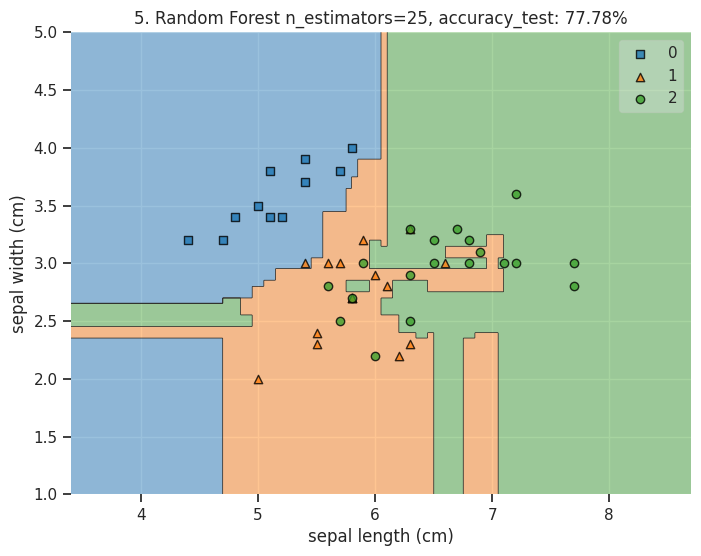


-------------------------------------------------------------------------------------------



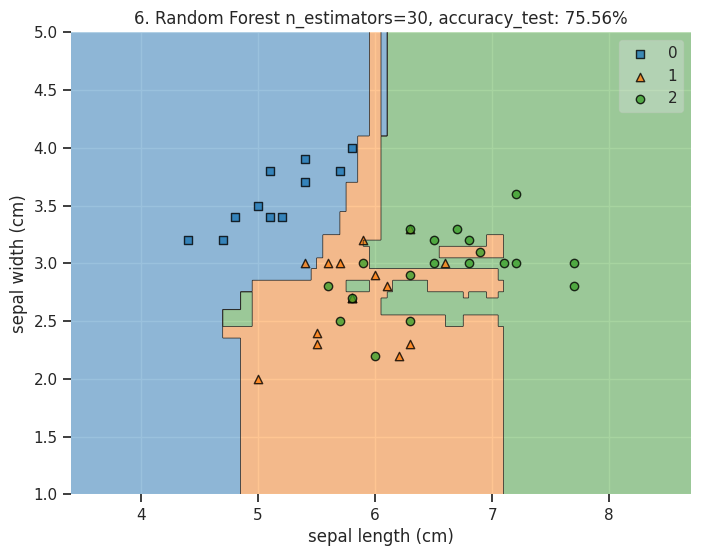


-------------------------------------------------------------------------------------------



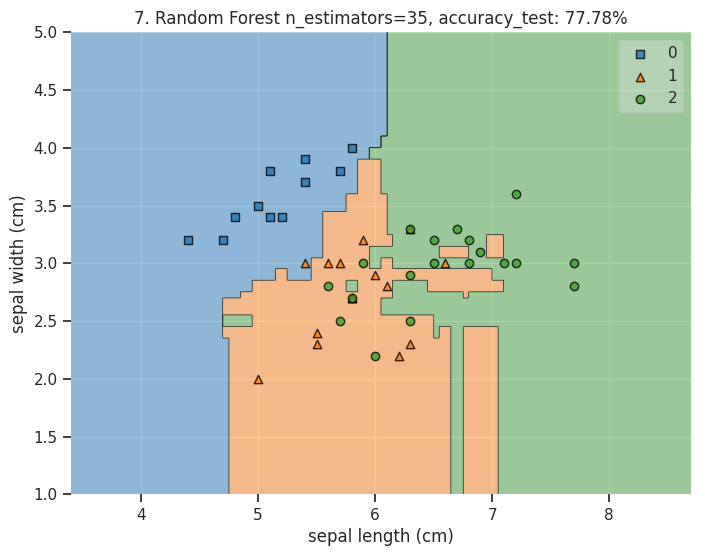


-------------------------------------------------------------------------------------------



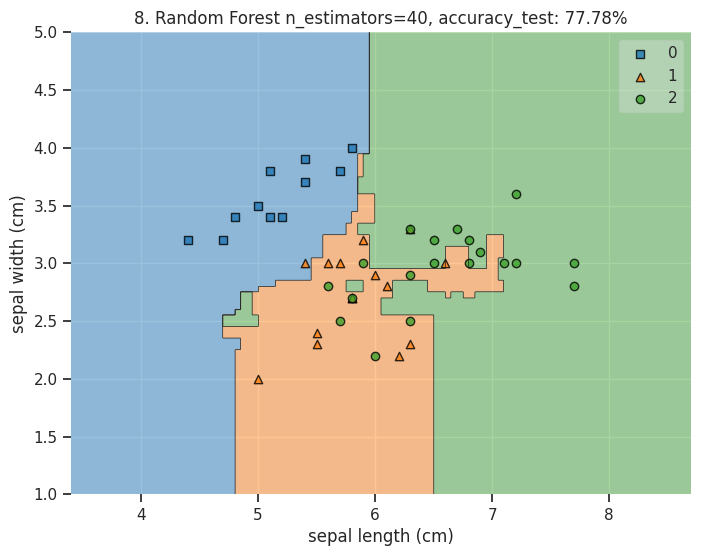


-------------------------------------------------------------------------------------------



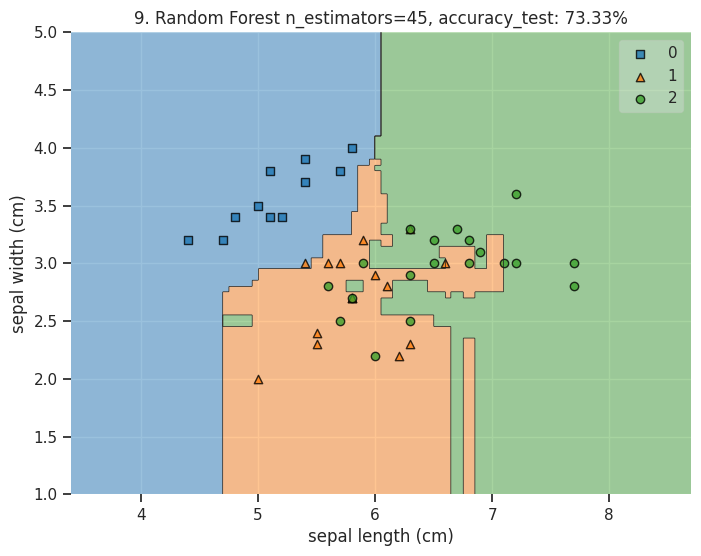


-------------------------------------------------------------------------------------------



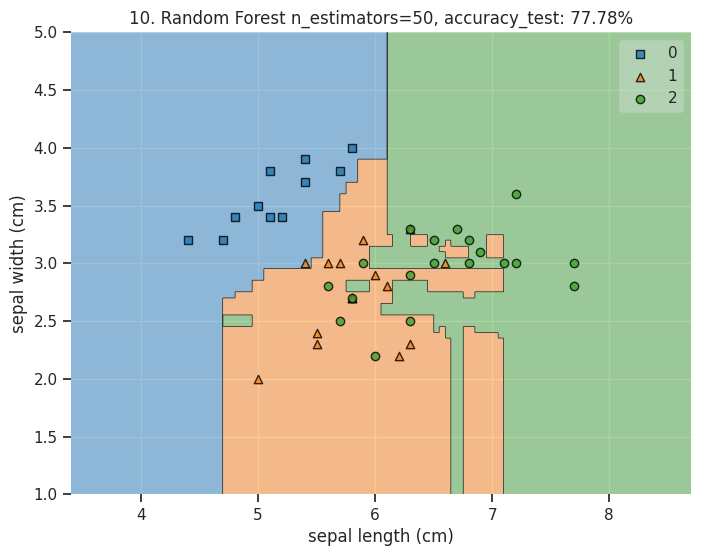


-------------------------------------------------------------------------------------------



In [ ]:
# Iterate over different values of n_estimators for the Random Forest classifier
for index, i in enumerate(range(5, 55, 5), start=1):

    classifier = RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train_np, y_train_np)
    accuracy = classifier.score(X_test_np, y_test_np)
    plt.figure(figsize=(8,6))
    plot_decision_regions(X_test_np, y_test_np, clf=classifier)
    plt.title(f'{index}. Random Forest n_estimators={i}, accuracy_test: {accuracy*100:.2f}%')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

    print('\n' + '-' * 91 + '\n')


### <a name='8'> </a> Model-based Prediction

In [ ]:
# Initialize the Random Forest classifier with 100 decision trees, fit the classifier on the training data
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_np, y_train_np)

y_true = y_test_np.copy()
y_pred = classifier.predict(X_test_np)

# Create a DataFrame with true and predicted values
predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred':y_pred})
predictions = predictions.reset_index(drop=True)
predictions.head()

,y_true,y_pred
0,2,1
1,1,1
2,0,0
3,1,1
4,2,2


In [ ]:
# Get the predicted probabilities for the test set using the logistic regression model
y_prob = classifier.predict_proba(X_test_np)

# Create a DataFrame to hold the predicted probabilities for each class
predictions_proba = pd.DataFrame(data=y_prob, columns=['Class 0', 'Class 1', 'Class 2']).round(2)
predictions_proba.head()

,Class 0,Class 1,Class 2
0,0.00,0.98,0.02
1,0.00,0.69,0.31
2,0.98,0.01,0.01
3,0.06,0.90,0.04
4,0.00,0.08,0.92


### <a name='9'> </a> Model evaluation

In [ ]:
# Import necessary metrics from sklearn for model evaluat
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
from mlxtend.plotting import plot_confusion_matrix

- Accuracy

In [ ]:
accuracy = accuracy_score(y_test_np,y_pred)
print(f'Accuracy: {(accuracy * 100):.2f}%')

Accuracy: 75.56%


In [ ]:
predictions = predictions.sort_values(by='y_true')
predictions = predictions.reset_index(drop=True)
predictions['sample'] = predictions.index + 1
predictions

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,0,9
9,0,0,10


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=predictions['sample'], y=predictions['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=predictions['sample'], y=predictions['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=1800, height=600, title='Klasyfikator binarny')
fig.show()

- Confusion Matrix

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm):
    cm = cm[::-1] # Reverse the order of rows for better visual alignment
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2', 'true_1', 'true_0'])

    # Create an annotated heatmap using plotly
    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    # Update layout properties for the heatmap
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=16)

    fig.show()


plot_confusion_matrix(cm)

- Classification report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.60      0.80      0.69        15
           2       0.85      0.58      0.69        19

    accuracy                           0.76        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.78      0.76      0.75        45



- Precision

In [ ]:
precision = np.round(precision_score(y_test, y_pred, average='macro'),2)
print(f'The precision score of {precision} indicates that {precision * 100:.2f}% of the predicted positive cases are true positives. \nThis means that the model is highly reliable when it predicts the positive class.')


The precision score of 0.79 indicates that 79.00% of the predicted positive cases are true positives. 
This means that the model is highly reliable when it predicts the positive class.


- Recall

In [ ]:
recall = np.round(recall_score(y_test, y_pred, average='macro'),2)
print(f'Recall: {recall * 100:.2f}% of actual positives are correctly identified.')

Recall: 79.00% of actual positives are correctly identified.


- F1-score

In [ ]:
f1 = np.round(f1_score(y_test, y_pred, average='macro'),2)
print(f'F1 Score: {f1*100:.2f}% - This score represents the balance between precision and recall.')

F1 Score: 78.00% - This score represents the balance between precision and recall.


- Log-Loss

In [ ]:
loss = np.round(log_loss(y_test, y_prob),2)
print(f'Log Loss: {loss*100:.2f}% - This indicates how well the model predicts probabilities for each class.')

Log Loss: 61.00% - This indicates how well the model predicts probabilities for each class.


### <a name='11'></a> ROC AUC

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovo')
roc_auc

0.9096757044125465

In [ ]:
# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

# Create a DataFrame to store FPR and TPR values, rounding to two decimal places
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr}).round(2)
roc

,fpr,tpr
0,0.00,0.00
1,0.37,0.13
2,0.63,0.93
3,1.00,1.00


In [ ]:
# Function to plot the ROC curve for a multi-class problem
def plot_multiclass_roc_curve(y_true, y_prob, num_classes):
    fig = go.Figure()

    # Loop through each class to compute the ROC curve
    for i in range(num_classes):
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_true == i, y_prob[:, i])  # binary: class i vs. rest

        # Add ROC curve to the figure
        fig.add_trace(go.Scatter(x=fpr, y=tpr,
                                 mode='lines',
                                 name=f'ROC Curve for Class {i}',
                                 line=dict(width=2)))

    # Add a diagonal line (random prediction line)
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                             mode='lines',
                             line=dict(dash='dash', color='navy'),
                             name='Random Prediction'))

    # Update layout
    fig.update_layout(
        title='ROC Curves for Multi-Class Classification',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        showlegend=True,
        width=700
    )

    fig.show()


plot_multiclass_roc_curve(y_test, y_prob, num_classes=3)
